# KNN Train/Inference

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("모터속도 클래스 추가.csv")
df['MOTORSPEED_CLASS'] = df['CLASS_MOTORSPEED']
df1 = pd.get_dummies(df,columns=['CLASS_MOTORSPEED'])
df2 = pd.get_dummies(df1,columns=['INSP'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          835200 non-null  int64 
 1   DATE_TIME           835200 non-null  object
 2   NUM                 835200 non-null  int64 
 3   MELT_WEIGHT         835200 non-null  int64 
 4   MELT_TEMP           835200 non-null  int64 
 5   MOTORSPEED          835200 non-null  int64 
 6   TAG                 835200 non-null  int64 
 7   MOTORSPEED_CLASS    835200 non-null  int64 
 8   CLASS_MOTORSPEED_1  835200 non-null  uint8 
 9   CLASS_MOTORSPEED_2  835200 non-null  uint8 
 10  CLASS_MOTORSPEED_3  835200 non-null  uint8 
 11  CLASS_MOTORSPEED_4  835200 non-null  uint8 
 12  CLASS_MOTORSPEED_5  835200 non-null  uint8 
 13  CLASS_MOTORSPEED_6  835200 non-null  uint8 
 14  CLASS_MOTORSPEED_7  835200 non-null  uint8 
 15  INSP_3.17           835200 non-null  uint8 
 16  IN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
df = df2.copy()
y = df['TAG']
x = df.copy()
knn_data_x, xgboost_x, knn_data_y, xgboost_y = train_test_split(x,y,test_size=0.5,stratify=y)

In [ ]:
y = knn_data_y
x = knn_data_x
knn_train_input, knn_val_input, knn_train_target, knn_val_target = train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
knn_train_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334080 entries, 681797 to 432081
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          334080 non-null  int64 
 1   DATE_TIME           334080 non-null  object
 2   NUM                 334080 non-null  int64 
 3   MELT_WEIGHT         334080 non-null  int64 
 4   MELT_TEMP           334080 non-null  int64 
 5   MOTORSPEED          334080 non-null  int64 
 6   TAG                 334080 non-null  int64 
 7   MOTORSPEED_CLASS    334080 non-null  int64 
 8   CLASS_MOTORSPEED_1  334080 non-null  uint8 
 9   CLASS_MOTORSPEED_2  334080 non-null  uint8 
 10  CLASS_MOTORSPEED_3  334080 non-null  uint8 
 11  CLASS_MOTORSPEED_4  334080 non-null  uint8 
 12  CLASS_MOTORSPEED_5  334080 non-null  uint8 
 13  CLASS_MOTORSPEED_6  334080 non-null  uint8 
 14  CLASS_MOTORSPEED_7  334080 non-null  uint8 
 15  INSP_3.17           334080 non-null  uint8 
 1

In [ ]:
knn_train_target

681797    1
777378    1
312942    0
626106    1
722163    1
         ..
490505    1
388965    1
655340    1
27339     1
432081    1
Name: TAG, Length: 334080, dtype: int64

In [ ]:
knn_val_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 767272 to 712287
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          83520 non-null  int64 
 1   DATE_TIME           83520 non-null  object
 2   NUM                 83520 non-null  int64 
 3   MELT_WEIGHT         83520 non-null  int64 
 4   MELT_TEMP           83520 non-null  int64 
 5   MOTORSPEED          83520 non-null  int64 
 6   TAG                 83520 non-null  int64 
 7   MOTORSPEED_CLASS    83520 non-null  int64 
 8   CLASS_MOTORSPEED_1  83520 non-null  uint8 
 9   CLASS_MOTORSPEED_2  83520 non-null  uint8 
 10  CLASS_MOTORSPEED_3  83520 non-null  uint8 
 11  CLASS_MOTORSPEED_4  83520 non-null  uint8 
 12  CLASS_MOTORSPEED_5  83520 non-null  uint8 
 13  CLASS_MOTORSPEED_6  83520 non-null  uint8 
 14  CLASS_MOTORSPEED_7  83520 non-null  uint8 
 15  INSP_3.17           83520 non-null  uint8 
 16  INSP_3.18       

In [ ]:
xgboost_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417600 entries, 168470 to 180773
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          417600 non-null  int64 
 1   DATE_TIME           417600 non-null  object
 2   NUM                 417600 non-null  int64 
 3   MELT_WEIGHT         417600 non-null  int64 
 4   MELT_TEMP           417600 non-null  int64 
 5   MOTORSPEED          417600 non-null  int64 
 6   TAG                 417600 non-null  int64 
 7   MOTORSPEED_CLASS    417600 non-null  int64 
 8   CLASS_MOTORSPEED_1  417600 non-null  uint8 
 9   CLASS_MOTORSPEED_2  417600 non-null  uint8 
 10  CLASS_MOTORSPEED_3  417600 non-null  uint8 
 11  CLASS_MOTORSPEED_4  417600 non-null  uint8 
 12  CLASS_MOTORSPEED_5  417600 non-null  uint8 
 13  CLASS_MOTORSPEED_6  417600 non-null  uint8 
 14  CLASS_MOTORSPEED_7  417600 non-null  uint8 
 15  INSP_3.17           417600 non-null  uint8 
 1

In [ ]:
train_target = knn_train_target
train_input = knn_train_input[['NUM','MOTORSPEED_CLASS']]
train_input['NUM'] = train_input['NUM']/1400
train_input['MOTORSPEED_CLASS'] = train_input['MOTORSPEED_CLASS']/7
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334080 entries, 681797 to 432081
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NUM               334080 non-null  float64
 1   MOTORSPEED_CLASS  334080 non-null  float64
dtypes: float64(2)
memory usage: 7.6 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
val_target = knn_val_target
val_input = knn_val_input[['NUM','MOTORSPEED_CLASS']]
val_input['NUM'] = val_input['NUM']/1400
val_input['MOTORSPEED_CLASS'] = val_input['MOTORSPEED_CLASS']/7
val_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 767272 to 712287
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NUM               83520 non-null  float64
 1   MOTORSPEED_CLASS  83520 non-null  float64
dtypes: float64(2)
memory usage: 1.9 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
max=0
max_idx=0
for i in tqdm(range(1,101)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_input, train_target)
    temp = knn.score(val_input,val_target)
    print(i, temp)
    if temp>max:
        max=temp
        max_idx=i
print(max_idx, max)

  1%|          | 1/100 [00:02<04:18,  2.61s/it]

1 0.9166307471264368


  2%|▏         | 2/100 [00:05<04:13,  2.58s/it]

2 0.9151460727969348


  3%|▎         | 3/100 [00:08<04:23,  2.71s/it]

3 0.9333572796934866


  4%|▍         | 4/100 [00:10<04:19,  2.70s/it]

4 0.9324113984674329


  5%|▌         | 5/100 [00:13<04:10,  2.64s/it]

5 0.9387332375478927


  6%|▌         | 6/100 [00:15<04:06,  2.62s/it]

6 0.9398587164750958


  7%|▋         | 7/100 [00:18<04:12,  2.71s/it]

7 0.9417624521072797


  8%|▊         | 8/100 [00:21<04:05,  2.67s/it]

8 0.9425646551724138


  9%|▉         | 9/100 [00:24<04:03,  2.67s/it]

9 0.9433788314176246


 10%|█         | 10/100 [00:26<04:01,  2.68s/it]

10 0.9440014367816092


 11%|█         | 11/100 [00:29<03:59,  2.69s/it]

11 0.9442289272030652


 12%|█▏        | 12/100 [00:32<04:00,  2.74s/it]

12 0.9452227011494253


 13%|█▎        | 13/100 [00:34<03:56,  2.72s/it]

13 0.9447916666666667


 14%|█▍        | 14/100 [00:37<03:53,  2.71s/it]

14 0.9456657088122605


 15%|█▌        | 15/100 [00:40<03:52,  2.74s/it]

15 0.9451269157088122


 16%|█▌        | 16/100 [00:43<03:57,  2.83s/it]

16 0.945749521072797


 17%|█▋        | 17/100 [00:46<03:53,  2.82s/it]

17 0.9452705938697318


 18%|█▊        | 18/100 [00:48<03:48,  2.78s/it]

18 0.9460009578544061


 19%|█▉        | 19/100 [00:51<03:48,  2.82s/it]

19 0.9454501915708812


 20%|██        | 20/100 [00:54<03:49,  2.86s/it]

20 0.9462643678160919


 21%|██        | 21/100 [00:57<03:42,  2.81s/it]

21 0.945713601532567


 22%|██▏       | 22/100 [01:00<03:38,  2.80s/it]

22 0.946360153256705


 23%|██▎       | 23/100 [01:03<03:38,  2.84s/it]

23 0.9455818965517241


 24%|██▍       | 24/100 [01:06<03:39,  2.89s/it]

24 0.9461206896551724


 25%|██▌       | 25/100 [01:09<03:36,  2.89s/it]

25 0.9451508620689655


 26%|██▌       | 26/100 [01:11<03:32,  2.87s/it]

26 0.9461805555555556


 27%|██▋       | 27/100 [01:15<03:34,  2.93s/it]

27 0.9452705938697318


 28%|██▊       | 28/100 [01:17<03:29,  2.91s/it]

28 0.9457734674329502


 29%|██▉       | 29/100 [01:20<03:24,  2.88s/it]

29 0.944588122605364


 30%|███       | 30/100 [01:23<03:22,  2.89s/it]

30 0.9453663793103448


 31%|███       | 31/100 [01:26<03:24,  2.96s/it]

31 0.944264846743295


 32%|███▏      | 32/100 [01:29<03:20,  2.95s/it]

32 0.9446958812260536


 33%|███▎      | 33/100 [01:32<03:16,  2.93s/it]

33 0.9434626436781609


 34%|███▍      | 34/100 [01:35<03:13,  2.93s/it]

34 0.9443845785440613


 35%|███▌      | 35/100 [01:38<03:13,  2.98s/it]

35 0.9428160919540229


 36%|███▌      | 36/100 [01:41<03:09,  2.97s/it]

36 0.9435105363984674


 37%|███▋      | 37/100 [01:44<03:07,  2.97s/it]

37 0.941977969348659


 38%|███▊      | 38/100 [01:47<03:03,  2.96s/it]

38 0.9427681992337165


 39%|███▉      | 39/100 [01:50<03:03,  3.01s/it]

39 0.9411159003831417


 40%|████      | 40/100 [01:53<03:00,  3.00s/it]

40 0.9419181034482759


 41%|████      | 41/100 [01:56<02:56,  2.99s/it]

41 0.9400502873563218


 42%|████▏     | 42/100 [01:59<02:52,  2.98s/it]

42 0.9410799808429119


 43%|████▎     | 43/100 [02:02<02:53,  3.04s/it]

43 0.9392001915708812


 44%|████▍     | 44/100 [02:05<02:49,  3.02s/it]

44 0.9403975095785441


 45%|████▌     | 45/100 [02:08<02:45,  3.01s/it]

45 0.9384937739463601


 46%|████▌     | 46/100 [02:11<02:44,  3.04s/it]

46 0.9395114942528736


 47%|████▋     | 47/100 [02:14<02:43,  3.08s/it]

47 0.9374161877394636


 48%|████▊     | 48/100 [02:17<02:40,  3.08s/it]

48 0.938625478927203


 49%|████▉     | 49/100 [02:21<02:36,  3.07s/it]

49 0.9367456896551725


 50%|█████     | 50/100 [02:24<02:36,  3.14s/it]

50 0.9379909003831418


 51%|█████     | 51/100 [02:27<02:33,  3.13s/it]

51 0.9356920498084291


 52%|█████▏    | 52/100 [02:30<02:30,  3.13s/it]

52 0.9372246168582375


 53%|█████▎    | 53/100 [02:33<02:26,  3.12s/it]

53 0.9346503831417624


 54%|█████▍    | 54/100 [02:37<02:26,  3.19s/it]

54 0.9361350574712644


 55%|█████▌    | 55/100 [02:40<02:22,  3.16s/it]

55 0.9338362068965518


 56%|█████▌    | 56/100 [02:43<02:19,  3.16s/it]

56 0.935308908045977


 57%|█████▋    | 57/100 [02:46<02:18,  3.23s/it]

57 0.9332375478927203


 58%|█████▊    | 58/100 [02:49<02:14,  3.21s/it]

58 0.9343869731800766


 59%|█████▉    | 59/100 [02:52<02:11,  3.20s/it]

59 0.93231561302682


 60%|██████    | 60/100 [02:56<02:07,  3.19s/it]

60 0.9336805555555555


 61%|██████    | 61/100 [02:59<02:06,  3.25s/it]

61 0.9318247126436782


 62%|██████▏   | 62/100 [03:02<02:03,  3.24s/it]

62 0.9331776819923372


 63%|██████▎   | 63/100 [03:05<01:59,  3.23s/it]

63 0.9310584291187739


 64%|██████▍   | 64/100 [03:09<01:58,  3.29s/it]

64 0.9324113984674329


 65%|██████▌   | 65/100 [03:12<01:54,  3.26s/it]

65 0.930543582375479


 66%|██████▌   | 66/100 [03:15<01:50,  3.25s/it]

66 0.9317887931034483


 67%|██████▋   | 67/100 [03:19<01:46,  3.24s/it]

67 0.9294420498084291


 68%|██████▊   | 68/100 [03:22<01:45,  3.31s/it]

68 0.9311302681992337


 69%|██████▉   | 69/100 [03:25<01:41,  3.29s/it]

69 0.928867337164751


 70%|███████   | 70/100 [03:28<01:38,  3.28s/it]

70 0.9304358237547893


 71%|███████   | 71/100 [03:32<01:37,  3.36s/it]

71 0.928352490421456


 72%|███████▏  | 72/100 [03:35<01:33,  3.34s/it]

72 0.9298611111111111


 73%|███████▎  | 73/100 [03:39<01:30,  3.33s/it]

73 0.927705938697318


 74%|███████▍  | 74/100 [03:42<01:27,  3.38s/it]

74 0.929058908045977


 75%|███████▌  | 75/100 [03:46<01:24,  3.38s/it]

75 0.9273706896551724


 76%|███████▌  | 76/100 [03:49<01:21,  3.38s/it]

76 0.9283644636015326


 77%|███████▋  | 77/100 [03:52<01:17,  3.37s/it]

77 0.9266283524904214


 78%|███████▊  | 78/100 [03:56<01:15,  3.44s/it]

78 0.9279932950191571


 79%|███████▉  | 79/100 [03:59<01:12,  3.43s/it]

79 0.9261015325670499


 80%|████████  | 80/100 [04:03<01:08,  3.42s/it]

80 0.9274664750957854


 81%|████████  | 81/100 [04:06<01:06,  3.49s/it]

81 0.9254070881226054


 82%|████████▏ | 82/100 [04:10<01:02,  3.48s/it]

82 0.9269875478927203


 83%|████████▎ | 83/100 [04:13<00:59,  3.48s/it]

83 0.9245450191570881


 84%|████████▍ | 84/100 [04:17<00:56,  3.54s/it]

84 0.9262931034482759


 85%|████████▌ | 85/100 [04:20<00:52,  3.52s/it]

85 0.9242935823754789


 86%|████████▌ | 86/100 [04:24<00:49,  3.52s/it]

86 0.9258740421455939


 87%|████████▋ | 87/100 [04:28<00:46,  3.56s/it]

87 0.9236350574712644


 88%|████████▊ | 88/100 [04:31<00:42,  3.56s/it]

88 0.9252993295019157


 89%|████████▉ | 89/100 [04:35<00:39,  3.55s/it]

89 0.9233477011494253


 90%|█████████ | 90/100 [04:38<00:35,  3.57s/it]

90 0.9249281609195402


 91%|█████████ | 91/100 [04:42<00:32,  3.59s/it]

91 0.9231202107279693


 92%|█████████▏| 92/100 [04:46<00:28,  3.60s/it]

92 0.9244492337164751


 93%|█████████▎| 93/100 [04:49<00:25,  3.59s/it]

93 0.9223299808429118


 94%|█████████▍| 94/100 [04:53<00:21,  3.66s/it]

94 0.9236949233716475


 95%|█████████▌| 95/100 [04:57<00:18,  3.65s/it]

95 0.9218869731800766


 96%|█████████▌| 96/100 [05:00<00:14,  3.64s/it]

96 0.923132183908046


 97%|█████████▋| 97/100 [05:04<00:11,  3.70s/it]

97 0.9214319923371648


 98%|█████████▊| 98/100 [05:08<00:07,  3.68s/it]

98 0.9226293103448275


 99%|█████████▉| 99/100 [05:11<00:03,  3.67s/it]

99 0.9209650383141762


100%|██████████| 100/100 [05:15<00:00,  3.16s/it]

100 0.9220186781609195
22 0.946360153256705


In [ ]:
knn = KNeighborsClassifier(n_neighbors=max_idx)
knn.fit(train_input,train_target)
xgboost_x['SCALED_NUM'] = xgboost_x['NUM'] / 1400
xgboost_x['SCALED_MOTORSPEED_CLASS'] = xgboost_x['MOTORSPEED_CLASS'] / 7

proba_xgboost = knn.predict_proba(xgboost_x[['SCALED_NUM','SCALED_MOTORSPEED_CLASS']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SCALED_MOTORSPEED_CLASS
- SCALED_NUM
Feature names seen at fit time, yet now missing:
- MOTORSPEED_CLASS
- NUM

  warnings.warn(message, FutureWarning)


In [ ]:
proba_xgboost

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.09090909, 0.90909091],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [ ]:
proba_xgb = []
for i in range(len(proba_xgboost)):
  proba_xgb.append(proba_xgboost[i][1])

In [ ]:
xgboost_x['PROBA_OK'] = proba_xgb

In [ ]:
xgboost_x.describe()

,Unnamed: 0,NUM,MELT_WEIGHT,MELT_TEMP,MOTORSPEED,TAG,MOTORSPEED_CLASS,CLASS_MOTORSPEED_1,CLASS_MOTORSPEED_2,CLASS_MOTORSPEED_3,...,INSP_3.17,INSP_3.18,INSP_3.19,INSP_3.2,INSP_3.21,INSP_3.22,INSP_3.23,SCALED_NUM,SCALED_MOTORSPEED_CLASS,PROBA_OK
count,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,...,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000,417600.000000
mean,417788.785125,417788.785125,581.960237,509.399145,460.549035,0.787996,4.328511,0.036880,0.165417,0.205627,...,0.000242,0.128951,0.577246,0.093149,0.078728,0.121252,0.000431,298.420561,0.618359,0.794882
std,241128.632177,241128.632177,1219.944614,128.344112,640.006839,0.408728,1.855384,0.188467,0.371557,0.404160,...,0.015550,0.335146,0.493998,0.290641,0.269315,0.326421,0.020757,172.234737,0.265055,0.344039
min,0.000000,0.000000,0.000000,311.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000
25%,209009.500000,209009.500000,186.000000,430.000000,119.000000,1.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.292500,0.428571,0.772727
50%,417351.500000,417351.500000,383.000000,469.000000,168.000000,1.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,298.108214,0.571429,1.000000
75%,626710.500000,626710.500000,582.000000,502.000000,218.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,447.650357,0.857143,1.000000
max,835198.000000,835198.000000,55252.000000,832.000000,1804.000000,1.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,596.570000,1.000000,1.000000


In [ ]:
xgboost_x.to_csv("xgboost_input.csv")

In [ ]:
xgboost_y.to_csv("xgboost_target.csv")

# XGBoost Train/Inference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from glob import glob
from tqdm import tqdm
import warnings 
import scipy
import xgboost as xgb

from tqdm import tqdm
from sklearn.model_selection import train_test_split
# import sktime
import sklearn as skl
xgboost_x = pd.read_csv("xgboost_input.csv")
xgboost_y = pd.read_csv("xgboost_target.csv")

os.environ["CUDA_VISIBLE_DEVICES"]="0" 
warnings.filterwarnings(action='ignore')

plt.rcParams['figure.figsize']=(20,8)

def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100
#https://pseudo-lab.github.io/Tutorial-Book/chapters/time-series/Ch1-Time-Series.html#smape-symmetric-mean-absolute-percentage-error
#과대추정이 과소추정보다 패널티가 적은 LOSS

In [2]:
xgboost_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417600 entries, 0 to 417599
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               417600 non-null  int64  
 1   Unnamed: 0.1             417600 non-null  int64  
 2   DATE_TIME                417600 non-null  object 
 3   NUM                      417600 non-null  int64  
 4   MELT_WEIGHT              417600 non-null  int64  
 5   MELT_TEMP                417600 non-null  int64  
 6   MOTORSPEED               417600 non-null  int64  
 7   TAG                      417600 non-null  int64  
 8   MOTORSPEED_CLASS         417600 non-null  int64  
 9   CLASS_MOTORSPEED_1       417600 non-null  int64  
 10  CLASS_MOTORSPEED_2       417600 non-null  int64  
 11  CLASS_MOTORSPEED_3       417600 non-null  int64  
 12  CLASS_MOTORSPEED_4       417600 non-null  int64  
 13  CLASS_MOTORSPEED_5       417600 non-null  int64  
 14  CLAS

In [3]:
del xgboost_x['Unnamed: 0']
del xgboost_x['Unnamed: 0.1']
del xgboost_x['DATE_TIME']
del xgboost_x['NUM']
del xgboost_x['MELT_WEIGHT']
del xgboost_x['TAG']
del xgboost_x['MOTORSPEED_CLASS']
del xgboost_x['SCALED_NUM']
del xgboost_x['SCALED_MOTORSPEED_CLASS']
del xgboost_y['Unnamed: 0']
x= xgboost_x
y = xgboost_y

In [4]:

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417600 entries, 0 to 417599
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MELT_TEMP           417600 non-null  int64  
 1   MOTORSPEED          417600 non-null  int64  
 2   CLASS_MOTORSPEED_1  417600 non-null  int64  
 3   CLASS_MOTORSPEED_2  417600 non-null  int64  
 4   CLASS_MOTORSPEED_3  417600 non-null  int64  
 5   CLASS_MOTORSPEED_4  417600 non-null  int64  
 6   CLASS_MOTORSPEED_5  417600 non-null  int64  
 7   CLASS_MOTORSPEED_6  417600 non-null  int64  
 8   CLASS_MOTORSPEED_7  417600 non-null  int64  
 9   INSP_3.17           417600 non-null  int64  
 10  INSP_3.18           417600 non-null  int64  
 11  INSP_3.19           417600 non-null  int64  
 12  INSP_3.2            417600 non-null  int64  
 13  INSP_3.21           417600 non-null  int64  
 14  INSP_3.22           417600 non-null  int64  
 15  INSP_3.23           417600 non-nul

In [5]:

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417600 entries, 0 to 417599
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   TAG     417600 non-null  int64
dtypes: int64(1)
memory usage: 3.2 MB


In [6]:
train_val_x, test_x, train_val_y, test_y = train_test_split(x,y,stratify=y,test_size=0.2)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_val_x,train_val_y,stratify=train_val_y,test_size=0.2)

In [8]:
from sklearn.metrics import make_scorer, accuracy_score
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth,lr, n_trees, l1_reg, l2_reg, gamma ,min_child_w, subsample, colsample):
    # 모델 정의
    model = xgb.XGBClassifier(
                            tree_method ='gpu_hist',
                            gpu_id=0,
                            max_depth=int(max_depth),
                            learning_rate=lr,
                            n_estimators=int(n_trees),
                            gamma=gamma,
                            reg_alpha = l1_reg,
                            reg_lambda = l2_reg,
                            max_bin = 256,
                            min_child_weight = min_child_w,
                            subsample=subsample,
                            colsample_bytree = colsample, 
                            objective = 'binary:logistic',
                            enable_categorical=True,
                                )
    kfold = KFold(n_splits=5, shuffle=False)
    results = cross_val_score(model, train_val_x, train_val_y, cv=kfold, scoring=make_scorer(accuracy_score))
  #   # 모델 훈련
  #   model.fit(X_train, y_train)

  #   # 예측값 출력
  #   y_pred= model.predict(X_val)

  #   # 각종 metric 계산
  #   rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  # # r2 = r2_score(y_val, y_pred)
  # # smape = SMAPE(y_val, y_pred)
  # # 오차 최적화로 사용할 metric 반환
  #   scores.append(-rmse)
    return np.mean(results)

In [9]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#  bayesian-optimization 라이브러리의 BayesianOptimization 클래스 import
from bayes_opt import BayesianOptimization

# 실험해보고자하는 hyperparameter 집합
pbounds = {'max_depth': (6, 12),
           'lr': (1e-4, 0.1),
           'n_trees': (100, 1000),
           'l1_reg' : (0, 1000),
           'l2_reg' : (1, 1000),
           'min_child_w': (0.1, 10),
           'gamma': (0, 1000),
           'subsample':(0.7, 1),
           'colsample' :(0.5, 1),
            }

# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=3, random_state=7)    

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
bo.maximize(init_points=5, n_iter=50, acq='ei', xi=0.01)
# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다
# 찾은 파라미터 값 확인
# 100분

In [ ]:
print(bo.max)

{'target': 0.9876017720306514, 'params': {'colsample': 0.7710507470704555, 'gamma': 966.4632337219425, 'l1_reg': 6.821898114067859, 'l2_reg': 152.02832086452491, 'lr': 0.07442277211127547, 'max_depth': 8.7453251862128, 'min_child_w': 1.0977467814731436, 'n_trees': 794.6367910367022, 'subsample': 0.8139823677578465}}


In [11]:
model = xgb.XGBClassifier(
    booster='gbtree',
    tree_method ='gpu_hist',
    gpu_id=0,
    max_depth=9,
    learning_rate=0.074423,
    n_estimators=1000,
    # gamma=132.712,
    # reg_alpha =705,
    # reg_lambda =891,
    min_child_weight=1.0977,
    colsample_bytree=0.771,
    objective = 'binary:logistic',
    enable_categorical=True
)

# 모델 훈련
model.fit(X_train, y_train)

# 예측값 출력
y_pred= model.predict(X_val)

# 각종 metric 계산
acc = accuracy_score(y_val, y_pred)
print(acc)

0.986051245210728


In [12]:
from sklearn.metrics import classification_report
y_pred_train = model.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56661
           1       0.99      1.00      1.00    210603

    accuracy                           0.99    267264
   macro avg       0.99      0.99      0.99    267264
weighted avg       0.99      0.99      0.99    267264



In [13]:
y_pred_val= model.predict(X_val)
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     14165
           1       0.99      0.99      0.99     52651

    accuracy                           0.99     66816
   macro avg       0.98      0.98      0.98     66816
weighted avg       0.99      0.99      0.99     66816



In [14]:
y_pred_test= model.predict(test_x)
print(classification_report(test_y,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17707
           1       0.99      0.99      0.99     65813

    accuracy                           0.99     83520
   macro avg       0.98      0.98      0.98     83520
weighted avg       0.99      0.99      0.99     83520



# Explainability

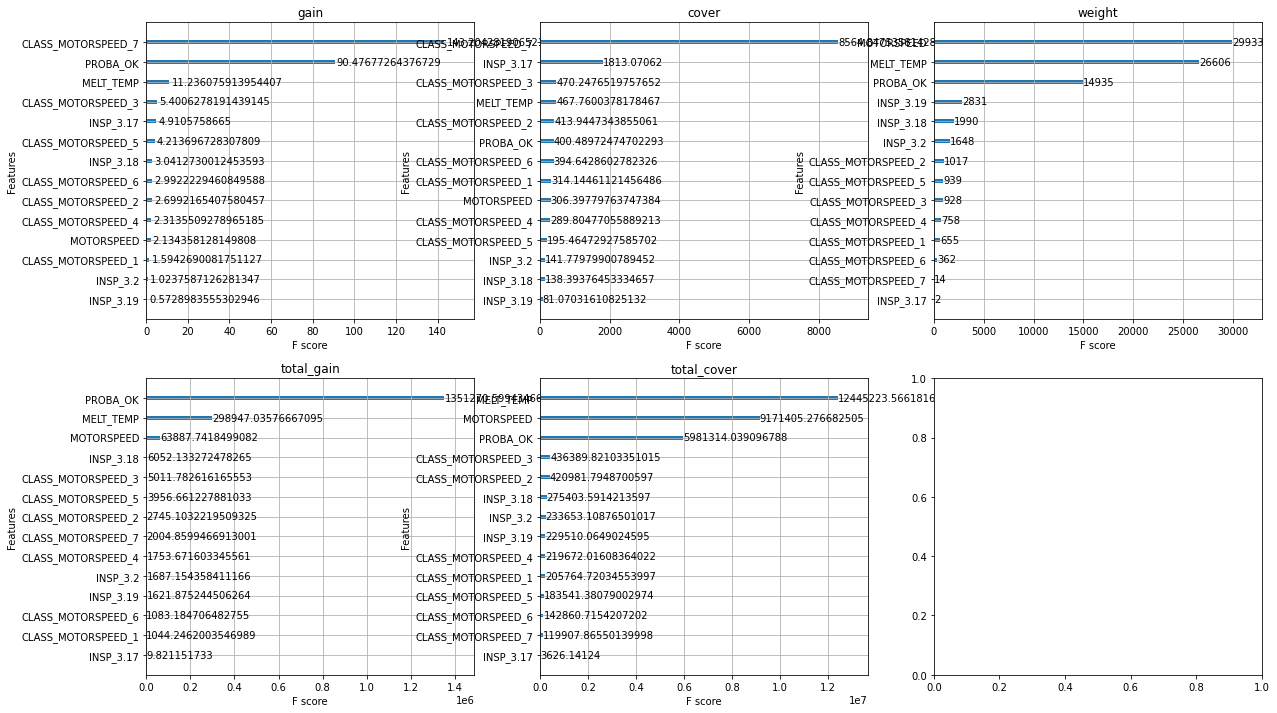

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = [ax for row_axes in axes for ax in row_axes]
xgb.plot_importance(model, importance_type='gain', title='gain', ax = axes[0], max_num_features=30)
xgb.plot_importance(model, importance_type='cover', title='cover', ax = axes[1])
xgb.plot_importance(model, importance_type='weight', title='weight', ax = axes[2])
xgb.plot_importance(model, importance_type='total_gain', title='total_gain', ax = axes[3])
xgb.plot_importance(model, importance_type='total_cover', title='total_cover', ax = axes[4])

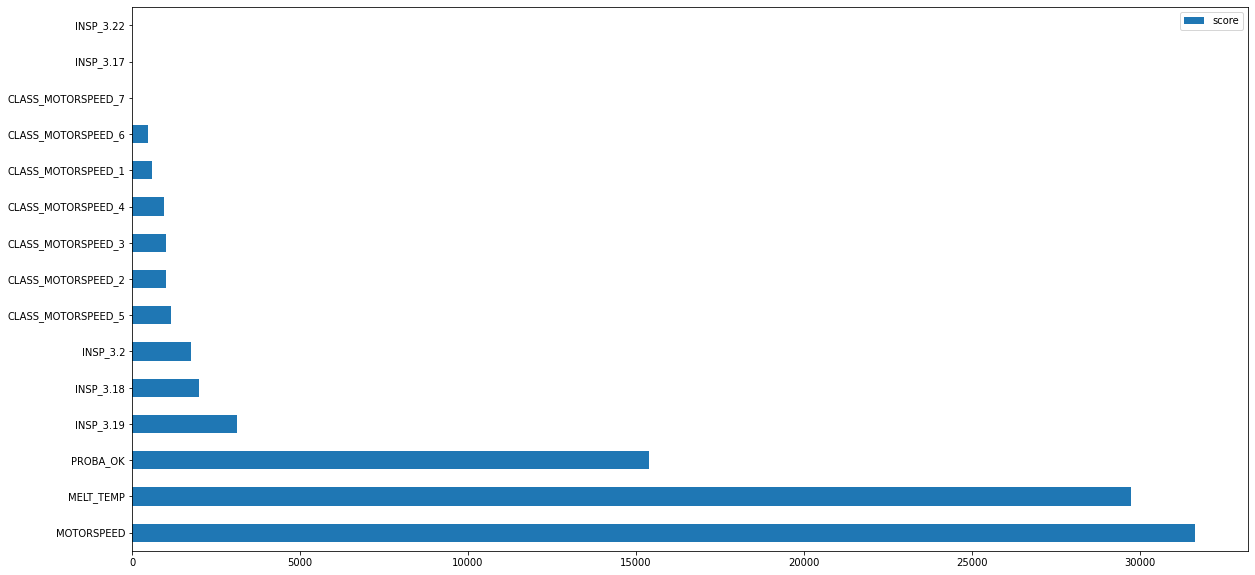

In [17]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [13]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
import shap
shap.initjs()
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
import shap
shap.initjs()
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_x)
shap.summary_plot(shap_values, test_x, plot_type="bar")